In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec

from sklearn.neighbors import LocalOutlierFactor
from scipy.spatial.distance import mahalanobis
from scipy.stats import chi2
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import StandardScaler 

In [2]:
df = pd.read_csv("datos_aire.csv")
df.head()

Unnamed: 0                 Time   PM10  PM2.5  Temp_Avg  RH_Avg  \
0           0  2025-01-01 00:00:00  24.02   6.45     14.05   26.32   
1           1  2025-01-01 01:00:00   8.14  15.45     13.49   25.87   
2           2  2025-01-01 02:00:00   4.74  10.11     12.90   27.23   
3           3  2025-01-01 03:00:00  17.02  11.99     11.89   29.65   
4           4  2025-01-01 04:00:00  19.32  13.37      9.75   33.57   

   WSpeed_Avg  WSpeed_Max  WDir_Avg  Rain_Tot  Press_Avg  Rad_Avg  \
0       2.517        6.33      74.9       0.0    807.889   -0.664   
1       2.925        6.60      69.1       0.0    807.854   -0.668   
2       3.220        5.94      75.0       0.0    807.906   -0.669   
3       3.019        6.87      58.5       0.0    807.670   -0.686   
4       2.726        5.09      19.4       0.0    807.355   -0.713   

   PM2.5_5horasdeps  PM10_5horasdeps  
0             13.37            19.32  
1             46.68            38.07  
2             49.31            50.55  
3             33.16            29.24  
4             31.52            32.41

In [3]:
df.columns

Index(['Unnamed: 0', 'Time', 'PM10', 'PM2.5', 'Temp_Avg', 'RH_Avg',
       'WSpeed_Avg', 'WSpeed_Max', 'WDir_Avg', 'Rain_Tot', 'Press_Avg',
       'Rad_Avg', 'PM2.5_5horasdeps', 'PM10_5horasdeps'],
      dtype='object')

In [4]:
del df['Unnamed: 0']

In [5]:
VariablesNumAnalis = ['PM10', 'PM2.5', 'Temp_Avg', 'RH_Avg',
       'WSpeed_Avg', 'WSpeed_Max', 'WDir_Avg', 'Rain_Tot', 'Press_Avg',
       'Rad_Avg', 'PM2.5_5horasdeps', 'PM10_5horasdeps'] 

df_data = df[VariablesNumAnalis].copy()

In [6]:
# Deteccion de vals atipicos por LOF

lof = LocalOutlierFactor()
df_data['LOF_score'] = lof.fit_predict(df_data)
df_data['LOF_score_abs'] = np.abs(lof.negative_outlier_factor_)
df_data.head()

PM10  PM2.5  Temp_Avg  RH_Avg  WSpeed_Avg  WSpeed_Max  WDir_Avg  Rain_Tot  \
0  24.02   6.45     14.05   26.32       2.517        6.33      74.9       0.0   
1   8.14  15.45     13.49   25.87       2.925        6.60      69.1       0.0   
2   4.74  10.11     12.90   27.23       3.220        5.94      75.0       0.0   
3  17.02  11.99     11.89   29.65       3.019        6.87      58.5       0.0   
4  19.32  13.37      9.75   33.57       2.726        5.09      19.4       0.0   

   Press_Avg  Rad_Avg  PM2.5_5horasdeps  PM10_5horasdeps  LOF_score  \
0    807.889   -0.664             13.37            19.32          1   
1    807.854   -0.668             46.68            38.07          1   
2    807.906   -0.669             49.31            50.55          1   
3    807.670   -0.686             33.16            29.24          1   
4    807.355   -0.713             31.52            32.41          1   

   LOF_score_abs  
0       1.008749  
1       1.347066  
2       1.484261  
3       1.149176  
4       1.094570

In [7]:
#Valores atipicos por la distancia de MAhalanobis
cov_matrix = np.cov(df_data[VariablesNumAnalis].T)
inv_cov_matrix = np.linalg.inv(cov_matrix)
df_data['Mahalanobis'] = df_data[VariablesNumAnalis].apply(lambda row: mahalanobis(row, df_data[VariablesNumAnalis].mean(), inv_cov_matrix),axis=1)
df_data['Mahalanobis_score'] = df_data['Mahalanobis']**2
df_data['p_value'] = 1 - chi2.cdf(df_data['Mahalanobis_score'],df_data[VariablesNumAnalis].shape[1])
df_data.head()

PM10  PM2.5  Temp_Avg  RH_Avg  WSpeed_Avg  WSpeed_Max  WDir_Avg  Rain_Tot  \
0  24.02   6.45     14.05   26.32       2.517        6.33      74.9       0.0   
1   8.14  15.45     13.49   25.87       2.925        6.60      69.1       0.0   
2   4.74  10.11     12.90   27.23       3.220        5.94      75.0       0.0   
3  17.02  11.99     11.89   29.65       3.019        6.87      58.5       0.0   
4  19.32  13.37      9.75   33.57       2.726        5.09      19.4       0.0   

   Press_Avg  Rad_Avg  PM2.5_5horasdeps  PM10_5horasdeps  LOF_score  \
0    807.889   -0.664             13.37            19.32          1   
1    807.854   -0.668             46.68            38.07          1   
2    807.906   -0.669             49.31            50.55          1   
3    807.670   -0.686             33.16            29.24          1   
4    807.355   -0.713             31.52            32.41          1   

   LOF_score_abs  Mahalanobis  Mahalanobis_score   p_value  
0       1.008749     2.681795           7.192025  0.844667  
1       1.347066     3.127408           9.780679  0.635195  
2       1.484261     3.350001          11.222505  0.509952  
3       1.149176     2.994942           8.969680  0.705518  
4       1.094570     2.974412           8.847129  0.715929

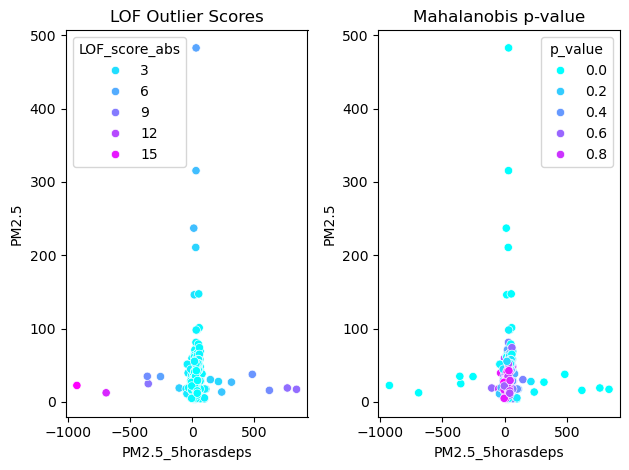

In [8]:
# Visualización de los resultados
plt.figure()

# LOF
plt.subplot(1, 2, 1)
sns.scatterplot(data=df_data, x='PM2.5_5horasdeps', y='PM2.5', hue='LOF_score_abs', palette='cool', legend=True)
plt.title('LOF Outlier Scores')

# Distancia de Mahalanobis
plt.subplot(1, 2, 2)
sns.scatterplot(data=df_data, x='PM2.5_5horasdeps', y='PM2.5', hue='p_value', palette='cool', legend=True)
plt.title('Mahalanobis p-value')

plt.tight_layout()
plt.show()


In [9]:
#definicion de umbrales
# Para LOF
umbral_lof = np.percentile(df_data['LOF_score_abs'],90)

# Para Mahalanobis

umbral_p_value = 0.05

df_data['LOF_outlier'] = np.where(df_data['LOF_score_abs']<umbral_lof,'Outlier','Norma;')
df_data['Mahalanobis_outlier'] = np.where(df_data['p_value']<umbral_p_value,'Outlier','Normal')

df_data.head()

PM10  PM2.5  Temp_Avg  RH_Avg  WSpeed_Avg  WSpeed_Max  WDir_Avg  Rain_Tot  \
0  24.02   6.45     14.05   26.32       2.517        6.33      74.9       0.0   
1   8.14  15.45     13.49   25.87       2.925        6.60      69.1       0.0   
2   4.74  10.11     12.90   27.23       3.220        5.94      75.0       0.0   
3  17.02  11.99     11.89   29.65       3.019        6.87      58.5       0.0   
4  19.32  13.37      9.75   33.57       2.726        5.09      19.4       0.0   

   Press_Avg  Rad_Avg  PM2.5_5horasdeps  PM10_5horasdeps  LOF_score  \
0    807.889   -0.664             13.37            19.32          1   
1    807.854   -0.668             46.68            38.07          1   
2    807.906   -0.669             49.31            50.55          1   
3    807.670   -0.686             33.16            29.24          1   
4    807.355   -0.713             31.52            32.41          1   

   LOF_score_abs  Mahalanobis  Mahalanobis_score   p_value LOF_outlier  \
0       1.008749     2.681795           7.192025  0.844667     Outlier   
1       1.347066     3.127408           9.780679  0.635195      Norma;   
2       1.484261     3.350001          11.222505  0.509952      Norma;   
3       1.149176     2.994942           8.969680  0.705518     Outlier   
4       1.094570     2.974412           8.847129  0.715929     Outlier   

  Mahalanobis_outlier  
0              Normal  
1              Normal  
2              Normal  
3              Normal  
4              Normal

In [10]:
df_data['LOF_outlier'].value_counts()

LOF_outlier
Outlier    1352
Norma;      151
Name: count, dtype: int64

In [11]:
df_data['Mahalanobis_outlier'].value_counts()

Mahalanobis_outlier
Normal     1416
Outlier      87
Name: count, dtype: int64

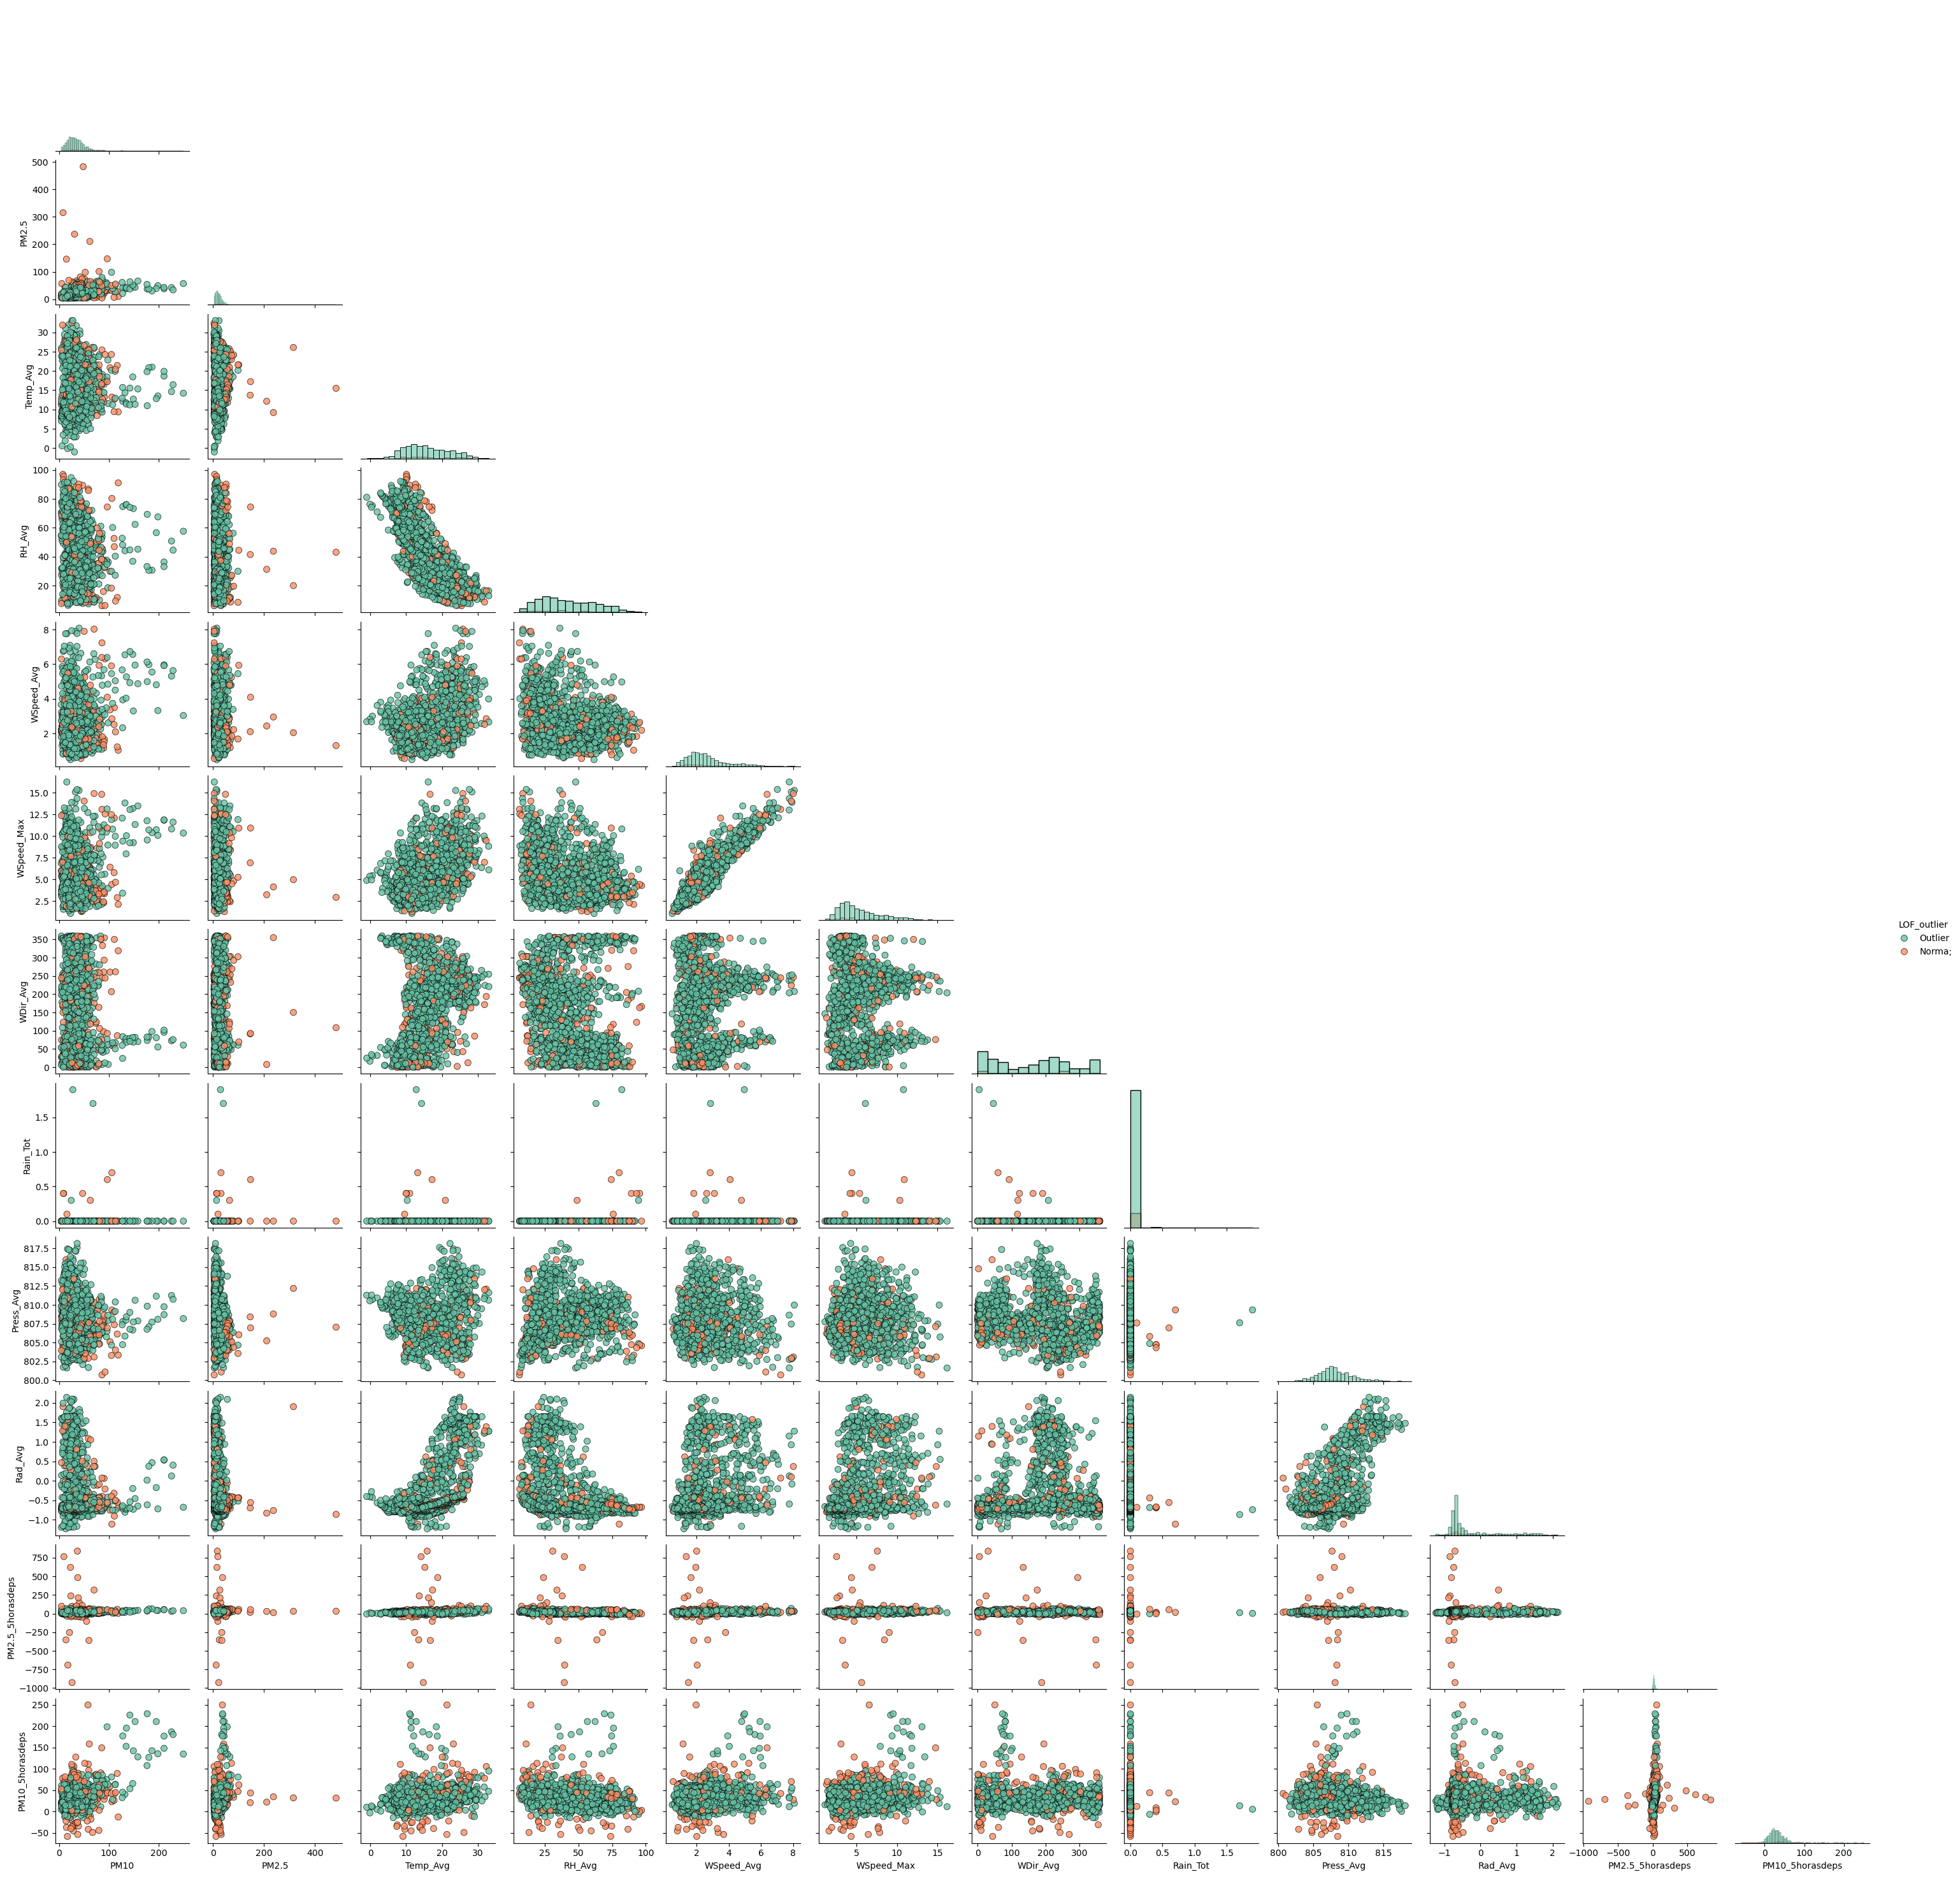

In [12]:
# Ahora, creamos la scatter plot matrix
sns.pairplot(df_data[VariablesNumAnalis+['LOF_outlier']], hue='LOF_outlier', diag_kind='hist', plot_kws={'alpha': 0.8, 's': 50, 'edgecolor': 'k'},
                        diag_kws={ 'alpha': 0.6}, corner=True, palette = 'Set2')

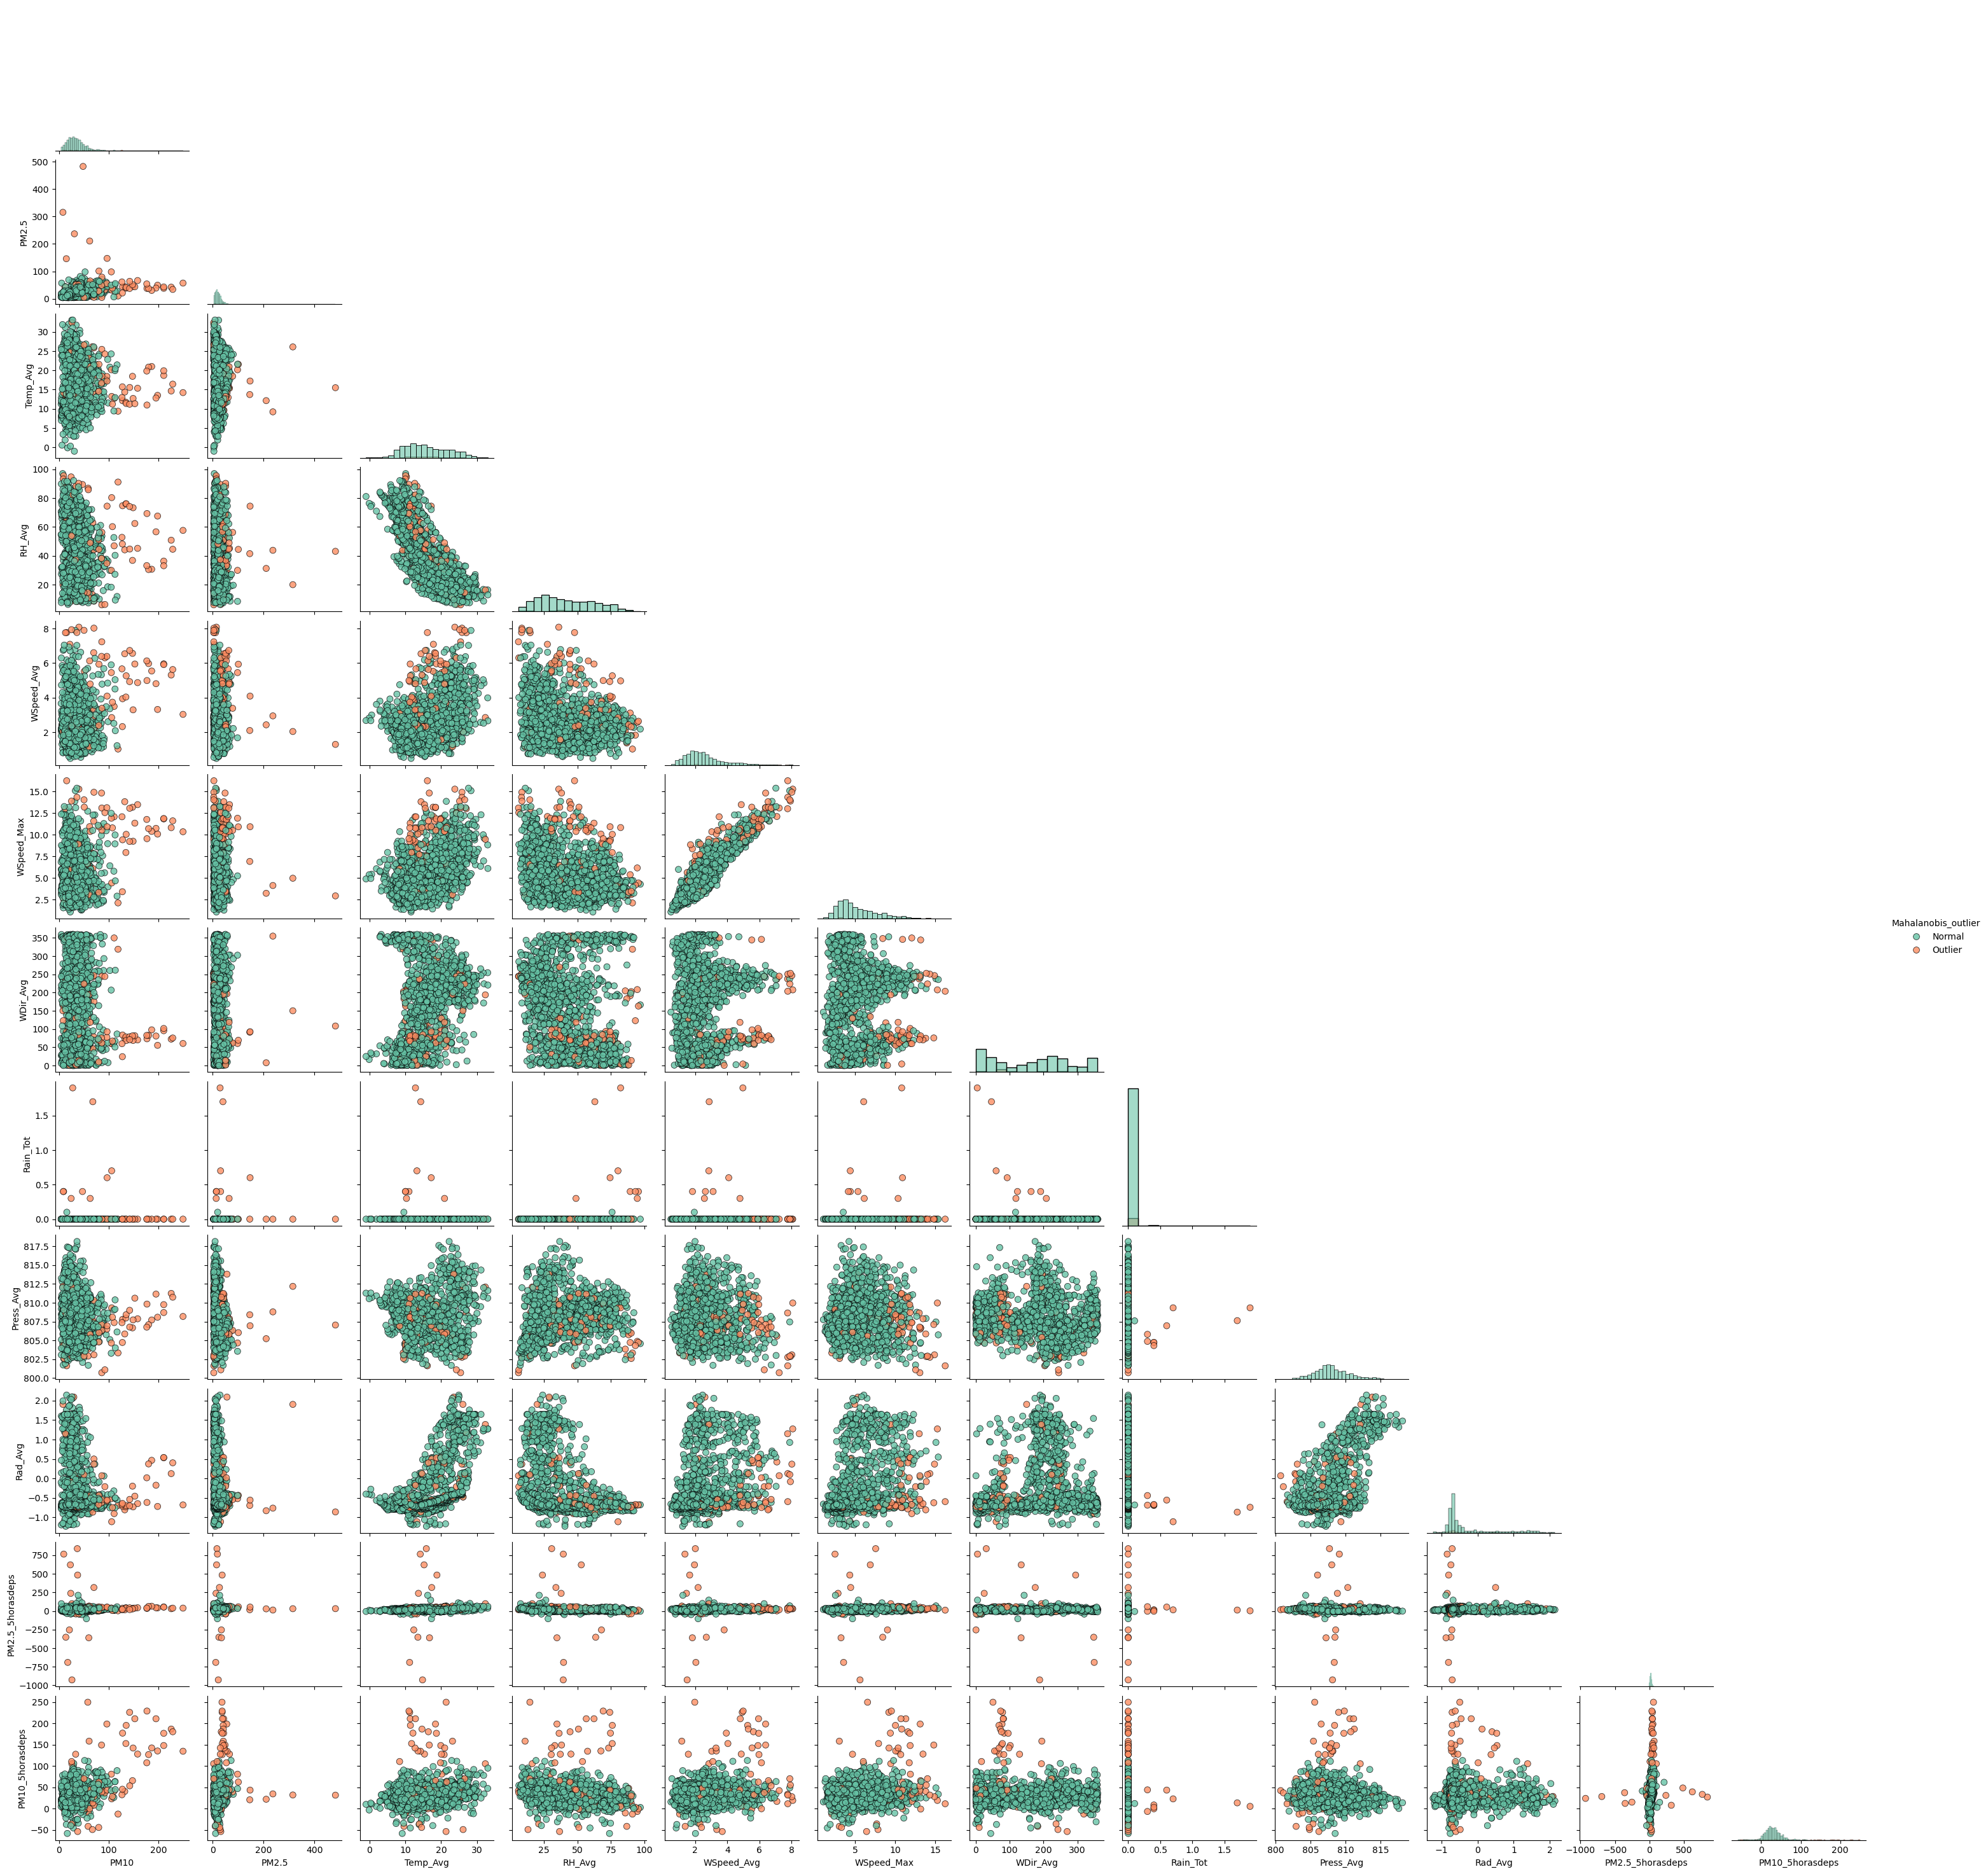

In [27]:
#Ahora ustedes obtengan el pairplot de las variables, mostrando los valores atípicos por el método de mahalanobis.
sns.pairplot(df_data[VariablesNumAnalis+['Mahalanobis_outlier']], hue='Mahalanobis_outlier', diag_kind='hist', plot_kws={'alpha': 0.8, 's': 50, 'edgecolor': 'k'},
                        diag_kws={ 'alpha': 0.6}, corner=True, palette = 'Set2')

In [13]:
df_data_sin_atipicos = df_data.loc[df_data['Mahalanobis_outlier']=='Normal', VariablesNumAnalis]
df_data_sin_atipicos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1416 entries, 0 to 1502
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PM10              1416 non-null   float64
 1   PM2.5             1416 non-null   float64
 2   Temp_Avg          1416 non-null   float64
 3   RH_Avg            1416 non-null   float64
 4   WSpeed_Avg        1416 non-null   float64
 5   WSpeed_Max        1416 non-null   float64
 6   WDir_Avg          1416 non-null   float64
 7   Rain_Tot          1416 non-null   float64
 8   Press_Avg         1416 non-null   float64
 9   Rad_Avg           1416 non-null   float64
 10  PM2.5_5horasdeps  1416 non-null   float64
 11  PM10_5horasdeps   1416 non-null   float64
dtypes: float64(12)
memory usage: 143.8 KB


In [15]:
df_data_sin_atipicos['Time'] = df['Time']
df_data_sin_atipicos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1416 entries, 0 to 1502
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PM10              1416 non-null   float64
 1   PM2.5             1416 non-null   float64
 2   Temp_Avg          1416 non-null   float64
 3   RH_Avg            1416 non-null   float64
 4   WSpeed_Avg        1416 non-null   float64
 5   WSpeed_Max        1416 non-null   float64
 6   WDir_Avg          1416 non-null   float64
 7   Rain_Tot          1416 non-null   float64
 8   Press_Avg         1416 non-null   float64
 9   Rad_Avg           1416 non-null   float64
 10  PM2.5_5horasdeps  1416 non-null   float64
 11  PM10_5horasdeps   1416 non-null   float64
 12  Time              1416 non-null   object 
dtypes: float64(12), object(1)
memory usage: 154.9+ KB


In [16]:
df_data_sin_atipicos.to_csv('datos_aire_sin_atipicos.csv')

In [30]:
data_dendograma = df[VariablesNumAnalis].copy()
scaler = StandardScaler()
df_scaled = scaler.fit_transform(data_dendograma)

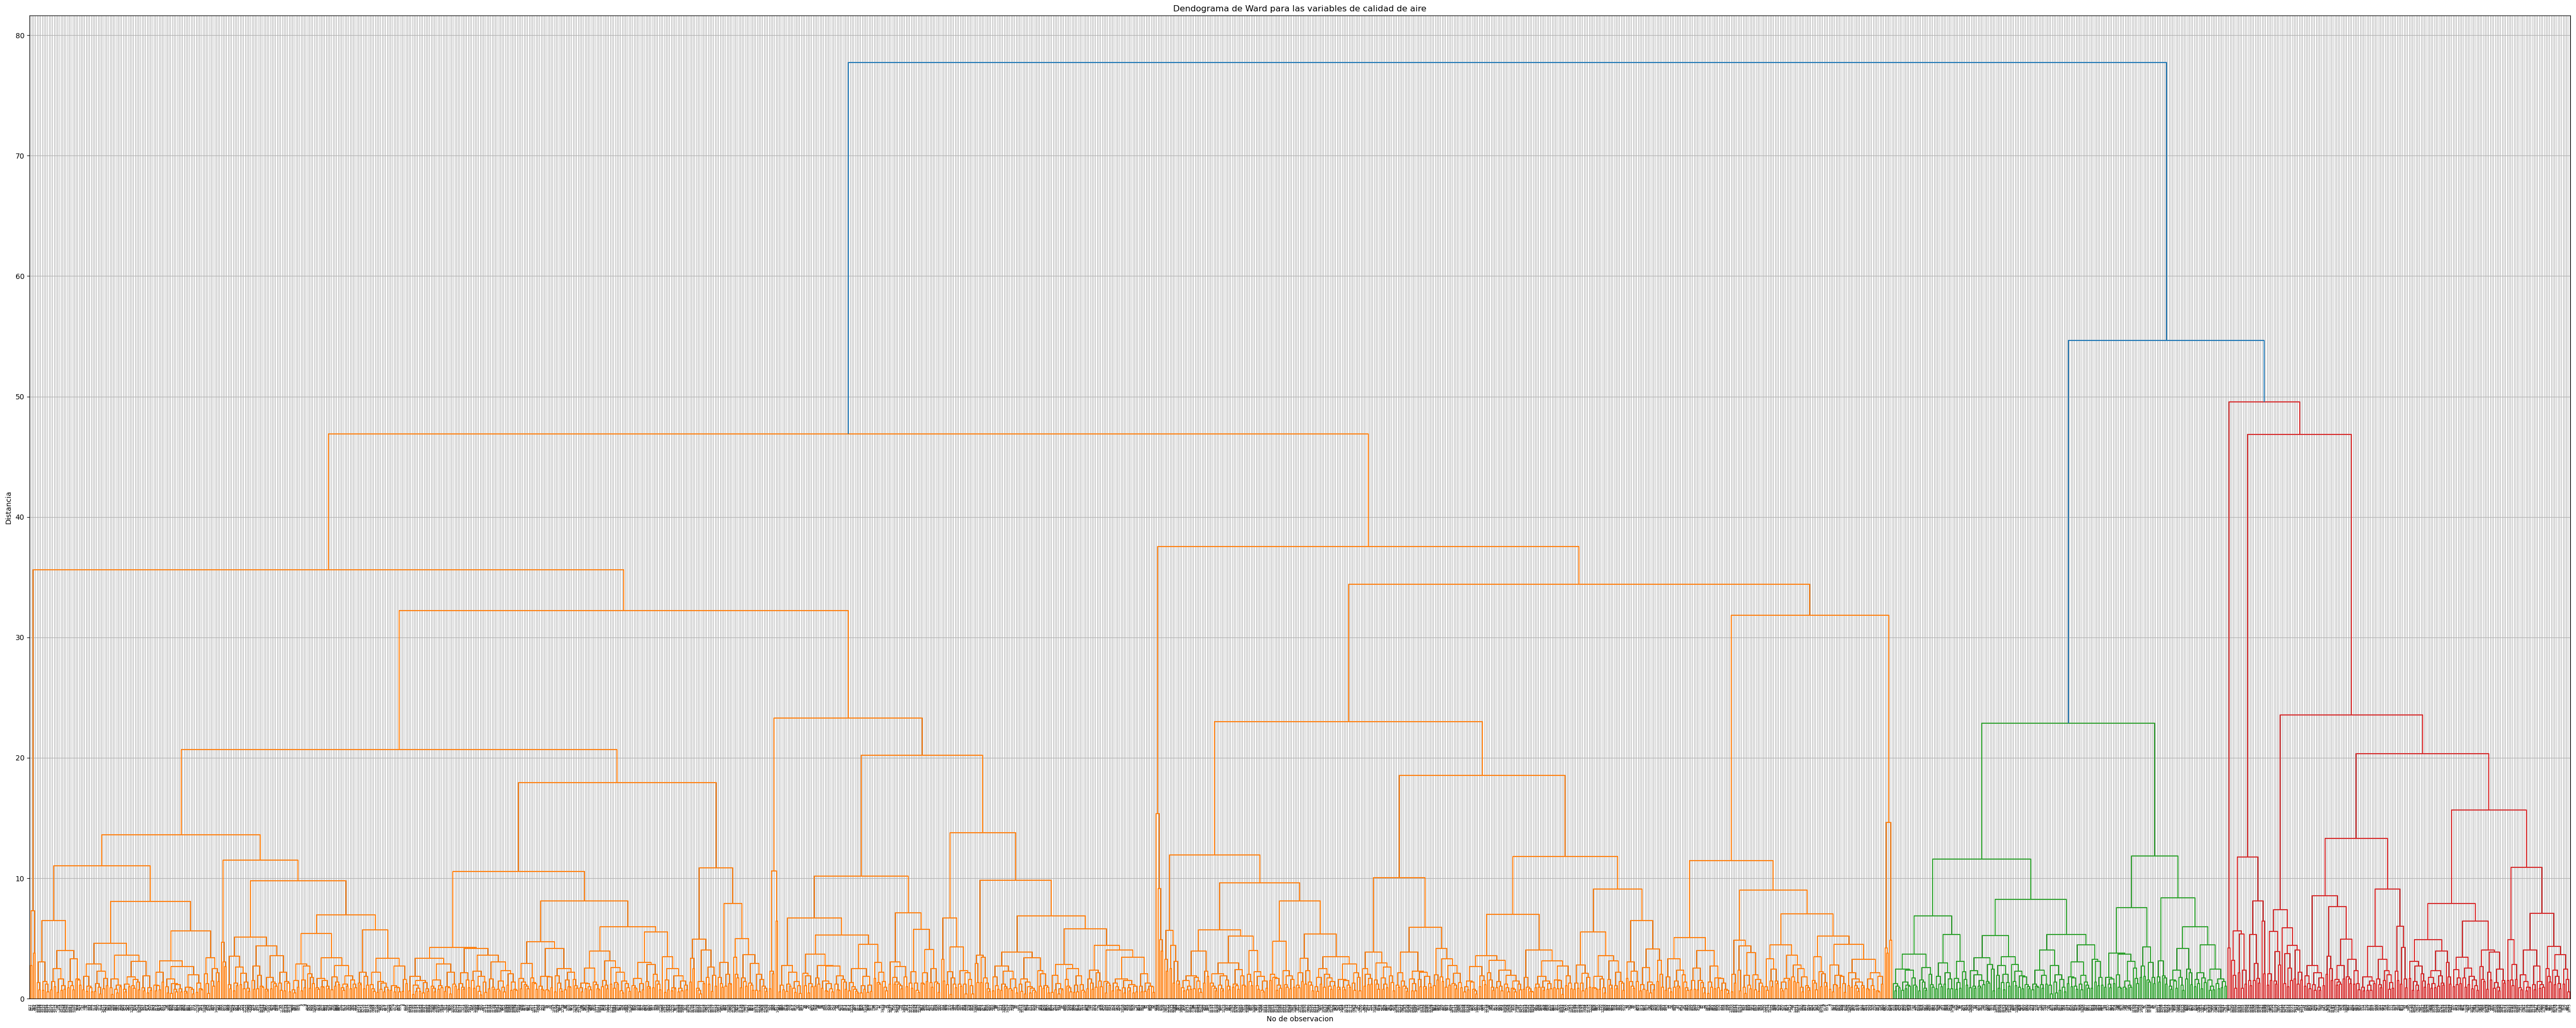

In [36]:
plt.figure(figsize=(50,20))
dendogram = sch.dendrogram(sch.linkage(df_scaled, method='ward'))
plt.title('Dendograma de Ward para las variables de calidad de aire')
plt.xlabel('No de observacion')
plt.ylabel('Distancia')
plt.tight_layout()
plt.grid()
plt.show()